In [76]:
#@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from pathlib import Path

# Change this to where you download the files
DATA = Path("/content/drive/My Drive/comp_genomics")

In [72]:
!pip install dendropy
!pip install Biopython

     |████████████████████████████████| 15.2MB 3.7MB/s 
  Created wheel for dendropy: filename=DendroPy-4.4.0-cp36-none-any.whl size=442139 sha256=d0298350b91483fc21fa693a5e50b974827c0d05f546884e5ac5b59b3271887a
  Stored in directory: /root/.cache/pip/wheels/88/76/d0/90381494189528abc27fab0faa25bf960143460963daae7ba7
Successfully built dendropy


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dendropy

/content/drive/My Drive/comp_genomics


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Example of Cell:Barcode set as defined by the DREAM challenge:
{'1': '2012212021', '2': '2112212021', '3': '2112212021', '4': '2112212021', '5': '0012212221', '6': '0012012221', '8': '2120010021', '9': '2120010021', '10': '0112212221'}

List of barcodes in a given set:
['2012212021', '2112212021', '2112212021', '2112212021', '0012212221', '0012012221', '2120010021', '2120010021', '0112212221']

Newick format for above case:
((1_2012210001:29,2_2012210001:29):51,(3_2212210001:29,4_2112210001:29):51);


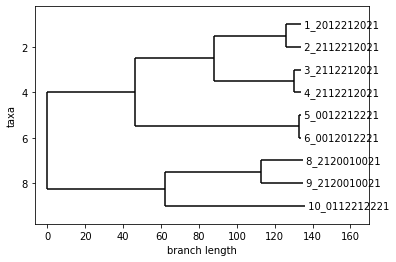

None


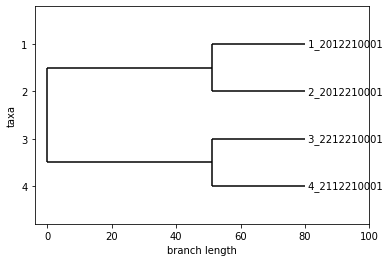

None


In [78]:
#import functions from intMemoirData.ipynb
%cd /content/drive/My Drive/comp_genomics
%run intMemoirData_v2.ipynb

#Alignment of Barcodes

These are the four barcodes in DreamID 1:

In [0]:
barcode_1 = ['2012210001', '2012210001', '2212210001', '2112210001']

Define a hypothetical scoring matrix:

In [80]:
score_matrix = np.array([[2,6,10],[6,0,4],[10,4,3]])
score_matrix

array([[ 2,  6, 10],
       [ 6,  0,  4],
       [10,  4,  3]])

Define a simple "alignment" function for aligning the two bardes: 
(Note: since we don;t need to deal with gaps here, DP is no longer necessary)

In [0]:
def global_alignment(x, y):
    #The inital state is 1111111111

    score = 0 # alignment score
    score_matrix = np.array([[2,6,10],[6,0,4],[10,4,3]])
    symbol = ''

    for i in range(10):
        score += score_matrix[int(x[i]), int(y[i])] # update score
        if x[i] == y[i]:
            symbol += '|'
        else:
            symbol += '.'

    return x, symbol, y, score


Aligning a pair of barcodes:

In [82]:
xalign, symbol ,yalign, score = global_alignment(barcode_1[2],barcode_1[3])
print(xalign)
print(symbol)
print(yalign)
print("score:", score)

2212210001
|.||||||||
2112210001
score: 19


Run all pairwise alignments for a set of barcodes, then save the result in a symmetrical matrix:

In [0]:
def generate_dendrogram(barcode, score_matrix):
    distance_matrix = np.zeros([len(barcode),len(barcode)], dtype=int)
    # pairwise alignment
    for i in range(len(barcode)):
      for j in range(i+1, len(barcode)):
        xalign, symbol ,yalign, score = global_alignment(barcode[i], barcode[j])
        distance_matrix[i,j] = score
        distance_matrix[j,i] = score
    # generate dendrogram
    dists = squareform(distance_matrix)
    linkage_matrix = linkage(dists, "single")
    leafsname = [str(y)+'_'+x for x,y in zip(barcode, range(1,len(barcode)+1))]
    plt = dendrogram(linkage_matrix, labels=leafsname, orientation='left')

    return plt,distance_matrix, linkage_matrix, leafsname

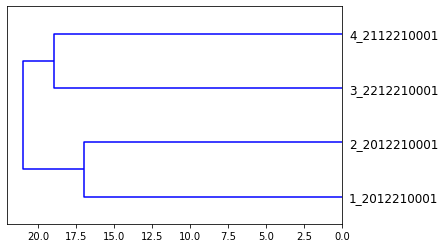

In [173]:
plot, dists, links, leafsname = generate_dendrogram(barcode_1, score_matrix)

In [86]:
dists # distance matrix

array([[ 0, 17, 25, 21],
       [17,  0, 25, 21],
       [25, 25,  0, 19],
       [21, 21, 19,  0]])

In [87]:
links # linkage matrix

array([[ 0.,  1., 17.,  2.],
       [ 2.,  3., 19.,  2.],
       [ 4.,  5., 21.,  4.]])

In [111]:
leafsname # leaves' names

['1_2012210001', '2_2012210001', '3_2212210001', '4_2112210001']

# Performance Evaluation

## 1. Create cell_data, cautious for file IO here:

In [88]:
cell_data = Cell_Data('DREAM_data_intMEMOIR.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
cell_data.train['CellBarcodes']

30     {'1': '2012212021', '2': '2112212021', '3': '2...
31     {'1': '1112212001', '2': '1112212001', '3': '1...
32     {'1': '2120211221', '2': '2120212221', '3': '2...
33     {'1': '2102111221', '2': '2102111221', '3': '2...
34     {'1': '0101001001', '2': '2101101000', '3': '2...
                             ...                        
101    {'1': '2110111221', '2': '2110111221', '3': '2...
102    {'1': '2112011221', '2': '2112211200', '3': '2...
103    {'1': '1112111111', '3': '1112111001', '4': '2...
104    {'1': '1111000011', '2': '0111111111', '3': '1...
105    {'2': '2100011021', '3': '0112211221', '4': '0...
Name: CellBarcodes, Length: 76, dtype: object

## 2. Reconstruct dendrogram drom barcodes

Use the first train set as an example:

In [90]:
# Here the first train_case has id = 30
train_case = cell_data.Train()[0]
print('Example of Cell:Barcode set as defined by the DREAM challenge:')
print(cell_data.train['CellBarcodes'][30])
print()
print('List of barcodes in a given set:')
print(train_case)

Example of Cell:Barcode set as defined by the DREAM challenge:
{'1': '2012212021', '2': '2112212021', '3': '2112212021', '4': '2112212021', '5': '0012212221', '6': '0012012221', '8': '2120010021', '9': '2120010021', '10': '0112212221'}

List of barcodes in a given set:
['2012212021', '2112212021', '2112212021', '2112212021', '0012212221', '0012012221', '2120010021', '2120010021', '0112212221']


Check the ground truth tree:

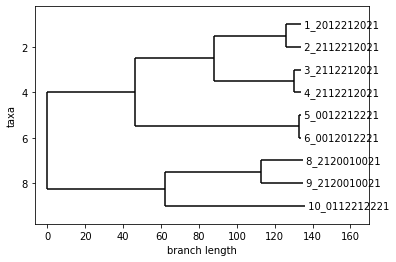

None


In [91]:
instance = showTree(cell_data.get_ground(train_case))

Generate dendrogram based on the hypothetical score_matrix:

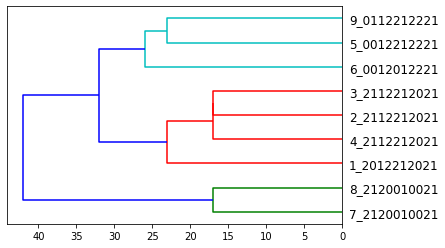

In [186]:
plot, dists, links, leafsname = generate_dendrogram(train_case, score_matrix) # train_case is just a list of barcodes

## 3. Convert into "Tree" object and get RF score

The Robinson-Foulds distance between two trees T1 and T2 with n tips is defined as (following the notation Steel and Penny 1993):

d
(
T
1
,
T
2
)
=
i
(
T
1
)
+
i
(
T
2
)
−
2
v
s
(
T
1
,
T
2
)

where 
i
(
T
1
)
 denotes the number of internal edges and 
v
s
(
T
1
,
T
2
)
 denotes the number of internal splits shared by the two trees. The **normalized Robinson-Foulds distance** is derived by dividing 
d
(
T
1
,
T
2
)
 by the maximal possible distance 
i
(
T
1
)
+
i
(
T
2
)
. 

Functions like RF.dist returns the Robinson-Foulds distance (Robinson and Foulds 1981) between either 2 trees or computes a matrix of all pairwise distances if a multiPhylo object is given.

For large number of trees the distance functions can use a lot of memory!

Convert the ground-truth tree in Newick format into a "tree" object for `dendropy`:

In [182]:
tns = dendropy.TaxonNamespace()
Ti = dendropy.Tree.get(data = cell_data.get_ground(train_case), schema="newick", taxon_namespace=tns)
Ti.print_plot()

                                                /---------------- 1 2012212021 
                                /---------------+                              
                                |               \---------------- 2 2112212021 
                /---------------+                                              
                |               |               /---------------- 3 2112212021 
                |               \---------------+                              
/---------------+                               \---------------- 4 2112212021 
|               |                                                              
|               |                               /---------------- 5 0012212221 
|               \-------------------------------+                              
+                                               \---------------- 6 0012012221 
|                                                                              
|                                       

Covert the reconstructed dendrogram into "Tree" object for `dendropy`:

In [0]:
from scipy.cluster import hierarchy
def getNewick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick

In [187]:
tree = hierarchy.to_tree(links,False) # put in the linkage matrix got from generate_dendrogram
tree_newick = getNewick(tree, "", tree.dist, leafsname) # Also put in the leaf names we have
Tj = dendropy.Tree.get(data = tree_newick, schema="newick", taxon_namespace=tns) # convert to tree object
Tj.print_plot()

                                                    /------------- 9 0112212221
                                       /------------+                          
             /-------------------------+            \------------- 5 0012212221
             |                         |                                       
             |                         \-------------------------- 6 0012012221
             |                                                                 
/------------+                                      /------------- 3 2112212021
|            |                         /------------+                          
|            |            /------------+            \------------- 2 2112212021
|            |            |            |                                       
+            \------------+            \-------------------------- 4 2112212021
|                         |                                                    
|                         \-------------

Returns unweighted Robinson-Foulds distance between two trees:

In [149]:
# the same tree produces RF distance = 0
dendropy.calculate.treecompare.unweighted_robinson_foulds_distance(Ti, Ti, is_bipartitions_updated=False)

0

Compare the ground-truth and the reconstructed

In [189]:
# Compare the ground-truth and the reconstructed
dendropy.calculate.treecompare.unweighted_robinson_foulds_distance(Ti, Tj, is_bipartitions_updated=False)

18

wrap up into function:

In [0]:
def get_RF(train_case, linkage, leafsname):
    tns = dendropy.TaxonNamespace()
    Ti = dendropy.Tree.get(data = cell_data.get_ground(train_case), schema="newick", taxon_namespace=tns)
    tree = hierarchy.to_tree(linkage,False) # put in the linkage matrix got from generate_dendrogram
    tree_newick = getNewick(tree, "", tree.dist, leafsname) # Also put in the leaf names we have
    Tj = dendropy.Tree.get(data = tree_newick, schema="newick", taxon_namespace=tns)
    rf = dendropy.calculate.treecompare.unweighted_robinson_foulds_distance(Ti, Tj, is_bipartitions_updated=False)
    return rf

In [191]:
get_RF(train_case, links, leafsname)

18